In [ ]:
import os

__author__ = 'Y H'

import warnings
with warnings.catch_warnings():
    warnings.filterwarnings('ignore')
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    %matplotlib inline
    import matplotlib.cm as cm
    from sklearn.decomposition import PCA
    from sklearn.manifold import TSNE

import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import load_img

from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Dall E Datasets
Dall_E = '/content/drive/MyDrive/Binary Classification Learn Dataset/01062023/'

calm_dall_e = os.listdir('/content/drive/MyDrive/Binary Classification Learn Dataset/01062023/calm/')
nervous_dall_e = os.listdir('/content/drive/MyDrive/Binary Classification Learn Dataset/01062023/uncalm/')

number_files_calm_dall_e = len(calm_dall_e)
number_files_nervous_dall_e = len(nervous_dall_e)

print ('Calm ; ', number_files_calm_dall_e) #504, At the beginning
print ('Uncalm ; ', number_files_nervous_dall_e) #504 , At the beginning

Calm ;  511
Uncalm ;  511


In [ ]:
input_path_dall_e = []
label_dall_e = []
Dall_E = '/content/drive/MyDrive/Binary Classification Learn Dataset/01062023/'

for class_name in os.listdir(Dall_E):
  for path in os.listdir('/content/drive/MyDrive/Binary Classification Learn Dataset/01062023/' + class_name):
    if class_name == 'uncalm':
      label_dall_e.append(1)
    else:
      label_dall_e.append(0)
    input_path_dall_e.append(os.path.join('/content/drive/MyDrive/Binary Classification Learn Dataset/01062023/', class_name, path))

print(input_path_dall_e[1], label_dall_e[1])
print(input_path_dall_e[-1], label_dall_e[-1])
#column name of the sheet
df_dalle=pd.DataFrame(list(zip(input_path_dall_e,label_dall_e )),columns=['images',"label "])
#change the file of exccl sheet
df_dalle.to_csv("//content/drive/MyDrive/Binary Classification Learn Dataset/20230601 All datasets Dall E.csv")

/content/drive/MyDrive/Binary Classification Learn Dataset/01062023/uncalm/DALL·E 2023-03-09 20.07.42 - visual geometric structure as a drawing in black and white that makes you Nervous .png 1
/content/drive/MyDrive/Binary Classification Learn Dataset/01062023/calm/DALL·E 2023-04-12 22.30.57 - a black and white design consisting of precise geometric shapes that inspires a feeling calmness.png 0


In [ ]:
input_path_dall_e_train = []
label_dall_e_train = []
Dall_E_train = '/content/drive/MyDrive/Binary Classification Split Folder/010623/train/'

for class_name in os.listdir(Dall_E_train):
  for path in os.listdir('/content/drive/MyDrive/Binary Classification Split Folder/010623/train/' + class_name):
    if class_name == 'uncalm':
      label_dall_e_train.append(1)
    else:
      label_dall_e_train.append(0)
    input_path_dall_e_train.append(os.path.join('/content/drive/MyDrive/Binary Classification Split Folder/010623/train/', class_name, path))

print(input_path_dall_e_train[1], label_dall_e_train[1])
print(input_path_dall_e_train[-1], label_dall_e_train[-1])
#column name of the sheet
df_train=pd.DataFrame(list(zip(input_path_dall_e_train,label_dall_e_train )),columns=['images',"label "])
#change the file of exccl sheet
df_train.to_csv("/content/drive/MyDrive/Binary Classification Split Folder/CSV Files/20230601 Train Dall E.csv")

/content/drive/MyDrive/Binary Classification Split Folder/010623/train/uncalm/DALL·E 2023-03-09 20.07.42 - visual geometric structure as a drawing in black and white that makes you Nervous .png 1
/content/drive/MyDrive/Binary Classification Split Folder/010623/train/calm/DALL·E 2023-04-12 22.30.57 - a black and white design consisting of precise geometric shapes that inspires a feeling calmness.png 0


In [ ]:
input_path_dall_e_val = []
label_dall_e_val = []
Dall_E_val = '/content/drive/MyDrive/Binary Classification Split Folder/010623/val/'

for class_name in os.listdir(Dall_E_val):
  for path in os.listdir('/content/drive/MyDrive/Binary Classification Split Folder/010623/val/' + class_name):
    if class_name == 'uncalm':
      label_dall_e_val.append(1)
    else:
      label_dall_e_val.append(0)
    input_path_dall_e_val.append(os.path.join('/content/drive/MyDrive/Binary Classification Split Folder/010623/val/', class_name, path))

print(input_path_dall_e_val[1], label_dall_e_val[1])
print(input_path_dall_e_val[-1], label_dall_e_val[-1])
#column name of the sheet
df_val=pd.DataFrame(list(zip(input_path_dall_e_val,label_dall_e_val )),columns=['images',"label "])
#change the file of exccl sheet
df_val.to_csv("/content/drive/MyDrive/Binary Classification Split Folder/CSV Files/20230601 Vall Dall E.csv")

/content/drive/MyDrive/Binary Classification Split Folder/010623/val/uncalm/DALL·E 2022-12-19 13.44.57 - visual inorganic structure as a drawing in black and white that makes you nervos.png 1
/content/drive/MyDrive/Binary Classification Split Folder/010623/val/calm/DALL·E 2023-04-13 11.27.11 - A simple yet elegant black and white pattern of geometric shapes that evokes a sense of calmness .png 0


In [ ]:
input_path_dall_e_test = []
label_dall_e_test = []
Dall_E_test = '/content/drive/MyDrive/Binary Classification Split Folder/010623/test/'

for class_name in os.listdir(Dall_E_test):
  for path in os.listdir('/content/drive/MyDrive/Binary Classification Split Folder/010623/test/' + class_name):
    if class_name == 'uncalm':
      label_dall_e_test.append(1)
    else:
      label_dall_e_test.append(0)
    input_path_dall_e_test.append(os.path.join('/content/drive/MyDrive/Binary Classification Split Folder/010623/test/', class_name, path))

print(input_path_dall_e_test[1], label_dall_e_test[1])
print(input_path_dall_e_test[-1], label_dall_e_test[-1])
#column name of the sheet
df_test=pd.DataFrame(list(zip(input_path_dall_e_test,label_dall_e_test )),columns=['images',"label "])
#change the file of exccl sheet
df_test.to_csv("/content/drive/MyDrive/Binary Classification Split Folder/CSV Files/20230601 Test Dall E.csv")

/content/drive/MyDrive/Binary Classification Split Folder/010623/test/uncalm/DALL·E 2023-03-09 20.02.36 - visual inorganic structure as a drawing in black and white that makes you Nervous  - Copy.png 1
/content/drive/MyDrive/Binary Classification Split Folder/010623/test/calm/DALL·E 2023-04-12 22.52.44 - organic calm grafis white _ black patern .png 0


In [ ]:
len(input_path_dall_e) #1008 images

1022

In [ ]:
len(label_dall_e) #output 1008 images

1022

In [ ]:
len(input_path_dall_e_train) #704 images

816

In [ ]:
len(label_dall_e_train) #output 704 images

816

In [ ]:
len(input_path_dall_e_val) #200 images

102

In [ ]:
len(label_dall_e_val) #output 200 images

102

In [ ]:
len(input_path_dall_e_test) #104 images

104

In [ ]:
len(label_dall_e_test) #output 104 images

104

In [ ]:
print(input_path_dall_e)
print(label_dall_e)

['/content/drive/MyDrive/Binary Classification Learn Dataset/01062023/uncalm/DALL·E 2023-03-09 20.07.36 - visual geometric structure as a drawing in black and white that makes you Nervous  - Copy.png', '/content/drive/MyDrive/Binary Classification Learn Dataset/01062023/uncalm/DALL·E 2023-03-09 20.07.42 - visual geometric structure as a drawing in black and white that makes you Nervous .png', '/content/drive/MyDrive/Binary Classification Learn Dataset/01062023/uncalm/DALL·E 2023-03-09 20.10.53 - visual geometric structure as a drawing in black and white that makes you Nervous  - Copy.png', '/content/drive/MyDrive/Binary Classification Learn Dataset/01062023/uncalm/DALL·E 2023-03-09 20.11.48 - visual geometric structure as a drawing in black and white that makes you Nervous .png', '/content/drive/MyDrive/Binary Classification Learn Dataset/01062023/uncalm/DALL·E 2023-03-09 20.02.36 - visual inorganic structure as a drawing in black and white that makes you Nervous  - Copy.png', '/conten

In [ ]:
import pandas as pd
df_dall_e = pd.DataFrame()
df_dall_e['images'] = input_path_dall_e
df_dall_e['label'] = label_dall_e
df_dall_e = df_dall_e.sample(frac=1).reset_index(drop=True)
df_dall_e.tail()

,images,label
1017,/content/drive/MyDrive/Binary Classification L...,0
1018,/content/drive/MyDrive/Binary Classification L...,1
1019,/content/drive/MyDrive/Binary Classification L...,1
1020,/content/drive/MyDrive/Binary Classification L...,1
1021,/content/drive/MyDrive/Binary Classification L...,0


In [ ]:
import pandas as pd
df_dalle = pd.DataFrame()
df_dalle['images'] = input_path_dall_e
df_dalle['label'] = label_dall_e
df_dalle = df_dalle.sample(frac=1).reset_index(drop=True)
df_dalle.tail()

,images,label
1017,/content/drive/MyDrive/Binary Classification L...,1
1018,/content/drive/MyDrive/Binary Classification L...,1
1019,/content/drive/MyDrive/Binary Classification L...,0
1020,/content/drive/MyDrive/Binary Classification L...,0
1021,/content/drive/MyDrive/Binary Classification L...,0


In [ ]:
import pandas as pd
df_train = pd.DataFrame()
df_train['images'] = input_path_dall_e_train
df_train['label'] = label_dall_e_train
df_train = df_train.sample(frac=1).reset_index(drop=True)
df_train.tail()

,images,label
811,/content/drive/MyDrive/Binary Classification S...,0
812,/content/drive/MyDrive/Binary Classification S...,1
813,/content/drive/MyDrive/Binary Classification S...,0
814,/content/drive/MyDrive/Binary Classification S...,0
815,/content/drive/MyDrive/Binary Classification S...,1


In [ ]:
import pandas as pd
df_val = pd.DataFrame()
df_val['images'] = input_path_dall_e_val
df_val['label'] = label_dall_e_val
df_val = df_val.sample(frac=1).reset_index(drop=True)
df_val.tail()

,images,label
97,/content/drive/MyDrive/Binary Classification S...,0
98,/content/drive/MyDrive/Binary Classification S...,1
99,/content/drive/MyDrive/Binary Classification S...,1
100,/content/drive/MyDrive/Binary Classification S...,0
101,/content/drive/MyDrive/Binary Classification S...,1


In [ ]:
import pandas as pd
df_test = pd.DataFrame()
df_test['images'] = input_path_dall_e_test
df_test['label'] = label_dall_e_test
df_test = df_test.sample(frac=1).reset_index(drop=True)
df_test.tail()

,images,label
99,/content/drive/MyDrive/Binary Classification S...,0
100,/content/drive/MyDrive/Binary Classification S...,1
101,/content/drive/MyDrive/Binary Classification S...,0
102,/content/drive/MyDrive/Binary Classification S...,1
103,/content/drive/MyDrive/Binary Classification S...,0


[Text(0, 0, '511'), Text(0, 0, '511')]

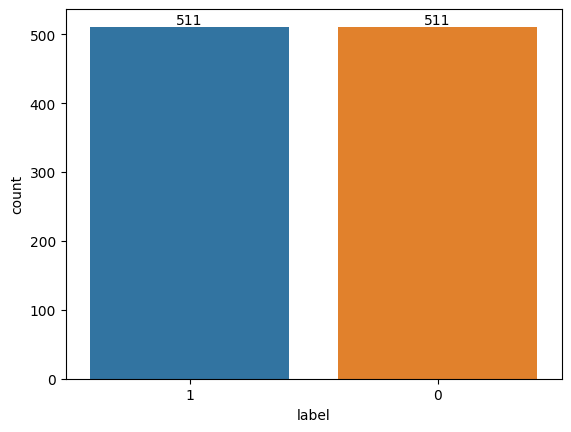

In [ ]:
import seaborn as sns
ax_dall_e = sns.countplot(x=df_dall_e['label'],
                   order=df_dall_e['label'].value_counts(ascending=False).index);

abs_values_dall_e = df_dall_e['label'].value_counts(ascending=False).values

ax_dall_e.bar_label(container=ax_dall_e.containers[0], labels=abs_values_dall_e)

#Balance datasets - 504 & 504

In [ ]:
df_dall_e['label'] = df_dall_e['label'].astype('str')

In [ ]:
train_dall_e, test_dall_e = train_test_split(df_dall_e, test_size = 0.2, random_state = 2023)

In [ ]:
train_dall_e.head()

,images,label
416,/content/drive/MyDrive/Binary Classification L...,0
880,/content/drive/MyDrive/Binary Classification L...,0
715,/content/drive/MyDrive/Binary Classification L...,0
496,/content/drive/MyDrive/Binary Classification L...,1
130,/content/drive/MyDrive/Binary Classification L...,0


In [ ]:
train_dall_e.shape

(817, 2)

In [ ]:
test_dall_e.shape

(205, 2)

In [ ]:
test_dall_e.head()

,images,label
448,/content/drive/MyDrive/Binary Classification L...,0
49,/content/drive/MyDrive/Binary Classification L...,0
425,/content/drive/MyDrive/Binary Classification L...,0
765,/content/drive/MyDrive/Binary Classification L...,1
493,/content/drive/MyDrive/Binary Classification L...,1


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from matplotlib.colors import ListedColormap
from mpl_toolkits import mplot3d
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.datasets import make_classification
from sklearn.svm import SVC
%matplotlib inline
import cv2
import os
from tqdm import tqdm

In [ ]:
DATADIR = '/content/drive/MyDrive/Binary Classification Learn Dataset/01062023/'
CATEGORIES = ['calm','uncalm']
IMG_SIZE=224

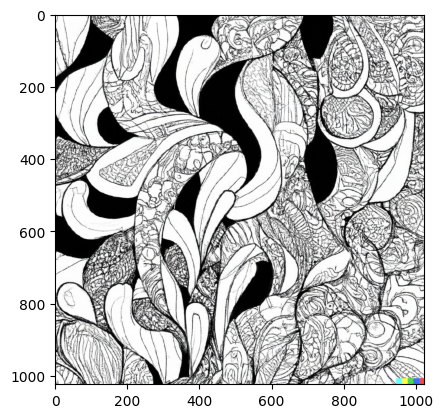

In [ ]:
for category in CATEGORIES:
    path=os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        plt.imshow(img_array)
        plt.show()
        break
    break

In [ ]:
training_data=[]
def create_training_data():
    for category in CATEGORIES:
        path=os.path.join(DATADIR, category)
        class_num=CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
create_training_data()

In [ ]:
print(len(training_data))

1022


In [ ]:
lenofimage = len(training_data)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# CNN Preprocess

In [ ]:
# Split data into train and validation sets
#train_set, val_set = train_test_split(train_df, test_size=0.2, random_state=42)
train_dall_e, test_dall_e = train_test_split(df_dalle, test_size = 0.2, random_state = 42)

# Define image data generator with augmentation
datagen_train = ImageDataGenerator(
    rotation_range=90,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    preprocessing_function=tf.keras.applications.resnet50.preprocess_input
)

datagen_val = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.resnet50.preprocess_input
)

In [ ]:
# Set image input size and batch size
img_size = (224, 224)
batch_size = 16
train_dall_e['label'] = train_dall_e['label'].astype('str')
test_dall_e['label'] = test_dall_e['label'].astype('str')

# Create train and validation generators
train_gen = datagen_train.flow_from_dataframe(
    train_dall_e,
    x_col='images',
    y_col='label',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True,
    seed=42
)

Found 817 validated image filenames belonging to 2 classes.


In [ ]:
val_gen = datagen_val.flow_from_dataframe(
    test_dall_e,
    x_col='images',
    y_col='label',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

Found 205 validated image filenames belonging to 2 classes.


In [ ]:
labels = {
    'calm': 0,
    'uncalm': 1
          }

In [ ]:
'''# Create the model
model_cnn_lpf = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), activation='tanh', input_shape=(224, 224, 3),activity_regularizer=Regularizer, kernel_regularizer=Regularizer),
    tf.keras.layers.AveragePooling2D(),
    tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), activation='tanh', activity_regularizer=Regularizer, kernel_regularizer=Regularizer),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), activation='tanh', activity_regularizer=Regularizer, kernel_regularizer=Regularizer),
    tf.keras.layers.AveragePooling2D(),
    #tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), activation='tanh'),
    #tf.keras.layers.AveragePooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu', activity_regularizer=Regularizer,kernel_regularizer='l2'),
    #tf.keras.layers.Dense(32, activation='relu', activity_regularizer=Regularizer,kernel_regularizer='l2'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
opt = keras.optimizers.Adam(learning_rate=0.0005)
model_cnn_lpf.compile(loss='binary_crossentropy',
              optimizer= opt,
              metrics=['accuracy'])

model_cnn_lpf.summary()'''

"# Create the model\nmodel_cnn_lpf = tf.keras.models.Sequential([\n    tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), activation='tanh', input_shape=(224, 224, 3),activity_regularizer=Regularizer, kernel_regularizer=Regularizer),\n    tf.keras.layers.AveragePooling2D(),\n    tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), activation='tanh', activity_regularizer=Regularizer, kernel_regularizer=Regularizer),\n    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),\n    tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), activation='tanh', activity_regularizer=Regularizer, kernel_regularizer=Regularizer),\n    tf.keras.layers.AveragePooling2D(),\n    #tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), activation='tanh'),\n    #tf.keras.layers.AveragePooling2D(),\n    tf.keras.layers.Flatten(),\n    tf.keras.layers.Dropout(0.2),\n    tf.keras.layers.Dense(128, activation='relu', activity_regularizer=Regularizer,kernel_regularizer='l2'),\n    #tf.keras.layers

# Without Augmentation

In [ ]:
image_directory = '/content/drive/MyDrive/Binary Classification Learn Dataset/01062023/'
SIZE = 224
dataset = []
label = []

In [ ]:
from PIL import Image
C_images = os.listdir(image_directory + 'calm/')
for i, image_name in enumerate(C_images):
    if (image_name.split('.')[1] == 'png'):
        image = cv2.imread(image_directory + 'calm/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(1)

N_images = os.listdir(image_directory + 'uncalm/')
for i, image_name in enumerate(N_images):
    if (image_name.split('.')[1] == 'png'):
        image = cv2.imread(image_directory + 'uncalm/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(0)

dataset = np.array(dataset)
label = np.array(label)

In [ ]:
print(dataset.shape)
print(label.shape)

(593, 224, 224, 3)
(593,)


Label for this image is:  0


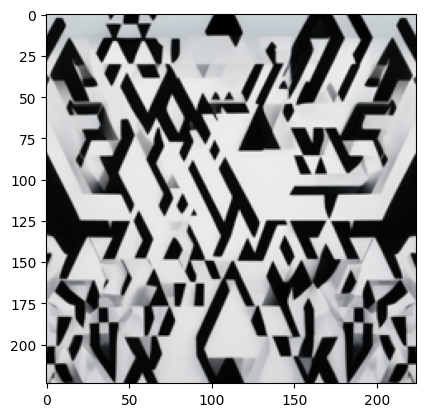

In [ ]:
import random
import numpy as np
image_number = random.randint(0, len(dataset)-1)
plt.imshow(np.reshape(dataset[image_number], (224, 224, 3)))
print("Label for this image is: ", label[image_number])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset, label, test_size = 0.25, random_state = 21)

In [ ]:
X_train

array([[[[232, 231, 228],
         [250, 248, 248],
         [243, 240, 241],
         ...,
         [168, 167, 168],
         [153, 152, 152],
         [152, 151, 152]],

        [[248, 247, 247],
         [240, 239, 238],
         [143, 141, 141],
         ...,
         [162, 161, 162],
         [157, 155, 156],
         [149, 147, 150]],

        [[245, 244, 244],
         [148, 147, 147],
         [ 35,  34,  35],
         ...,
         [153, 153, 153],
         [164, 163, 164],
         [163, 164, 165]],

        ...,

        [[113, 112, 112],
         [196, 196, 195],
         [162, 162, 161],
         ...,
         [  0,   1,   1],
         [  2,   2,   2],
         [  2,   2,   3]],

        [[ 43,  42,  40],
         [130, 129, 128],
         [190, 189, 188],
         ...,
         [  2,   2,   2],
         [  2,   1,   2],
         [  5,   4,   4]],

        [[ 61,  57,  58],
         [ 34,  31,  32],
         [130, 129, 131],
         ...,
         [ 22,  21,  21],
        

In [ ]:
y_train

array([0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,

In [ ]:
len(X_train)

444

In [ ]:
len(y_train)

444

In [ ]:
len(X_test)

149

In [ ]:
len(y_test)

149

In [ ]:
#Normalize
X_train = X_train / 255.
X_test = X_test / 255.

In [ ]:
X_train

array([[[[0.90980392, 0.90588235, 0.89411765],
         [0.98039216, 0.97254902, 0.97254902],
         [0.95294118, 0.94117647, 0.94509804],
         ...,
         [0.65882353, 0.65490196, 0.65882353],
         [0.6       , 0.59607843, 0.59607843],
         [0.59607843, 0.59215686, 0.59607843]],

        [[0.97254902, 0.96862745, 0.96862745],
         [0.94117647, 0.9372549 , 0.93333333],
         [0.56078431, 0.55294118, 0.55294118],
         ...,
         [0.63529412, 0.63137255, 0.63529412],
         [0.61568627, 0.60784314, 0.61176471],
         [0.58431373, 0.57647059, 0.58823529]],

        [[0.96078431, 0.95686275, 0.95686275],
         [0.58039216, 0.57647059, 0.57647059],
         [0.1372549 , 0.13333333, 0.1372549 ],
         ...,
         [0.6       , 0.6       , 0.6       ],
         [0.64313725, 0.63921569, 0.64313725],
         [0.63921569, 0.64313725, 0.64705882]],

        ...,

        [[0.44313725, 0.43921569, 0.43921569],
         [0.76862745, 0.76862745, 0.76470588]

In [ ]:
X_test

array([[[[0.25098039, 0.24705882, 0.25490196],
         [0.22745098, 0.22745098, 0.23137255],
         [0.23137255, 0.22745098, 0.23529412],
         ...,
         [0.23137255, 0.23137255, 0.23529412],
         [0.21960784, 0.22352941, 0.22745098],
         [0.22352941, 0.22352941, 0.22745098]],

        [[0.23137255, 0.22745098, 0.23137255],
         [0.21960784, 0.22352941, 0.22352941],
         [0.23529412, 0.23529412, 0.23921569],
         ...,
         [0.22745098, 0.23137255, 0.23137255],
         [0.21568627, 0.21960784, 0.22352941],
         [0.23137255, 0.23137255, 0.23529412]],

        [[0.23921569, 0.23921569, 0.24313725],
         [0.22352941, 0.22352941, 0.22745098],
         [0.23529412, 0.23529412, 0.23921569],
         ...,
         [0.23137255, 0.23529412, 0.23921569],
         [0.23137255, 0.23529412, 0.23921569],
         [0.23137255, 0.23137255, 0.23921569]],

        ...,

        [[0.26666667, 0.26666667, 0.2745098 ],
         [0.27058824, 0.27843137, 0.27843137]

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import Activation, Dropout, Flatten, Dense

SIZE = 224
INPUT_SHAPE = (SIZE, SIZE, 3)   #change to (SIZE, SIZE, 3)


cnn_model = Sequential()

cnn_model.add(Conv2D(32, (3, 3), input_shape=INPUT_SHAPE))
cnn_model.add(Activation('relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

cnn_model.add(Conv2D(32, (3, 3), kernel_initializer = 'he_uniform'))
cnn_model.add(Activation('relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

cnn_model.add(Conv2D(64, (3, 3), kernel_initializer = 'he_uniform'))
cnn_model.add(Activation('relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

cnn_model.add(Flatten())

cnn_model.add(Dense(64, kernel_initializer = 'he_uniform'))
cnn_model.add(Activation('relu'))
cnn_model.add(Dropout(0.2))

cnn_model.add(Dense(1))
cnn_model.add(Activation('sigmoid'))

In [ ]:
cnn_model.compile(loss='binary_crossentropy',
              optimizer='adam',             #also try adam
              metrics=['accuracy'])

print(cnn_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 activation (Activation)     (None, 222, 222, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      9248      
                                                                 
 activation_1 (Activation)   (None, 109, 109, 32)      0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                    

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
# Define callbacks for early stopping and saving best model
callbacks = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True,
    mode='min'
)

checkpoint = ModelCheckpoint(
    '/content/drive/MyDrive/Colab Notebooks/chekpoint CNN.h5',
    save_best_only=True,
    monitor='val_loss',
    mode='min'
)

In [ ]:
history_cnn_2 = cnn_model.fit(X_train,
                         y_train,
                         batch_size = 64,
                         verbose = 1,
                         epochs = 50,
                         validation_data=(X_test,y_test),
                         callbacks = callbacks,
                         shuffle = False
                     )

Epoch 1/50
7/7 [==============================] - 47s 6s/step - loss: 2.3523 - accuracy: 0.5068 - val_loss: 0.7299 - val_accuracy: 0.4497
Epoch 2/50
7/7 [==============================] - 36s 5s/step - loss: 0.7111 - accuracy: 0.5158 - val_loss: 0.7114 - val_accuracy: 0.4497
Epoch 3/50
7/7 [==============================] - 37s 5s/step - loss: 0.6635 - accuracy: 0.5788 - val_loss: 0.6380 - val_accuracy: 0.6779
Epoch 4/50
7/7 [==============================] - 37s 6s/step - loss: 0.6152 - accuracy: 0.7072 - val_loss: 0.6256 - val_accuracy: 0.6711
Epoch 5/50
7/7 [==============================] - 37s 5s/step - loss: 0.5772 - accuracy: 0.7140 - val_loss: 0.6072 - val_accuracy: 0.6980
Epoch 6/50
7/7 [==============================] - 37s 6s/step - loss: 0.5444 - accuracy: 0.7387 - val_loss: 0.5754 - val_accuracy: 0.7584
Epoch 7/50
7/7 [==============================] - 41s 6s/step - loss: 0.5223 - accuracy: 0.7680 - val_loss: 0.6029 - val_accuracy: 0.7114
Epoch 8/50
7/7 [==================

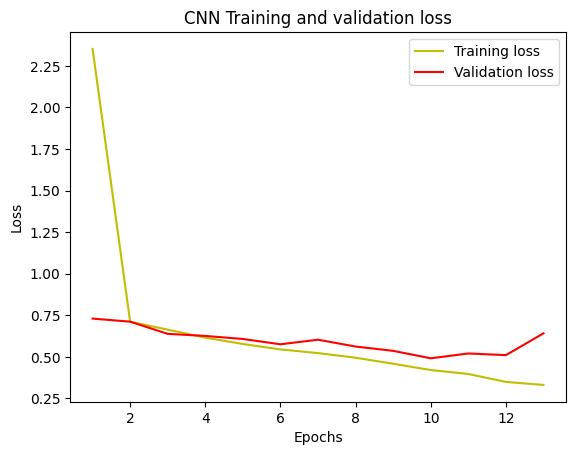

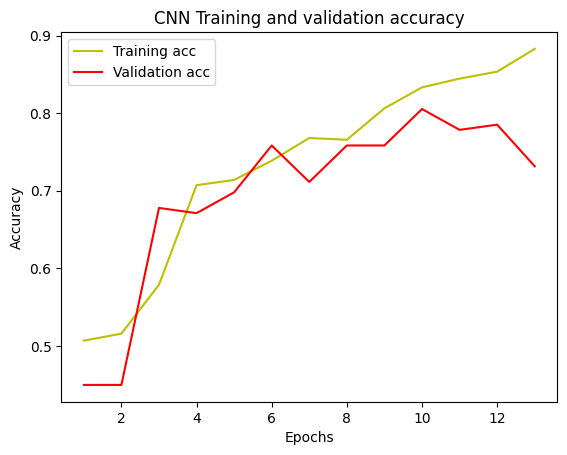

In [ ]:
loss = history_cnn_2.history['loss']
val_loss = history_cnn_2.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('CNN Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history_cnn_2.history['accuracy']
val_acc = history_cnn_2.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('CNN Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

1/1 [==============================] - 0s 127ms/step
The prediction for this image is:  [[0.58337283]]
The actual label for this image is:  1


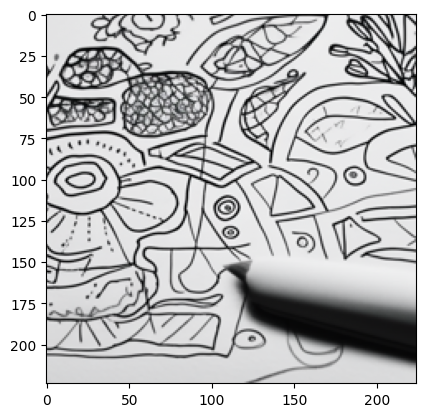

In [ ]:
#Test the model on single images
n = random.randint(0, len(X_test)-1)
img = X_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
print("The prediction for this image is: ", cnn_model.predict(input_img))
print("The actual label for this image is: ", y_test[n])

In [ ]:
_, acc = cnn_model.evaluate(X_test, y_test)
print("Accuracy = ", (acc * 100.0), "%")

5/5 [==============================] - 3s 513ms/step - loss: 0.4911 - accuracy: 0.8054
Accuracy =  80.53691387176514 %


In [ ]:
# source = https://www.youtube.com/watch?v=hraKTseOuJA
#source 2 = https://www.youtube.com/watch?v=J1jhfAw5Uvo&t=262s